# The k-Nearest-Neighbour Algorithm
## on the zip code dataset from the U.S. Postal Service

### Lorenzo Melchior

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = np.array(pd.read_csv('zip.train', sep=' ', header=None).drop(columns=[0,257]))
y = np.array(pd.read_csv('zip.train', sep=' ', header=None)[0]).astype(np.int32)
X_test = np.array(pd.read_csv('zip.test', sep=' ', header=None).drop(columns=0))
y_test = np.array(pd.read_csv('zip.test', sep=' ', header=None)[0])

In [15]:
def euklidean_distance(a, b):
    '''
    Calculates the euklidean Distance of two numpy arrays of the same size
    '''
    return np.sqrt(((a - b) ** 2).sum())

In [5]:
def highest_occurence(array):
    '''
    Searches the most frequent element in a numpy array
    '''
    counts = np.bincount(array)
    return np.argmax(counts)

In [58]:
class KNN:
    '''
    Class for the k-Nearest-Neighbour Classifier. Usage:
    classifier = KNN
    classifier.fit(X,y)
    classifier.predict(X_test, y_test)
    
    The results will be stored in the classifier attributes
    '''
    
    confusion_matrix = np.zeros((10,10), dtype=np.int32)
    wrong_predictions = 0
    wrong_predicated_indices = []
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X_test, y_test, k):
        
        self.X_test = X_test
        self.y_test = y_test
           
        for index, xt in enumerate(self.X_test):
            
            k_predictions = np.argsort([euklidean_distance(xt, x) for x in X])[:k]
            predicted_digit = highest_occurence(k_predictions)
            self.confusion_matrix[y_test[index]][y[predicted_digit]] += 1
            
            if y_test[index] != y[predicted_digit]:
                self.wrong_predictions += 1
                self.wrong_predicated_indices.append(index)
    
            index += 1

In [64]:
classifier = KNN()

In [65]:
classifier.fit(X, y)

## We classify with $k=3$

In [66]:
classifier.predict(X_test, y_test, k=3)

### The results shown in a counfusion matrix

In [67]:
classifier.confusion_matrix

array([[355,   0,   2,   0,   0,   0,   0,   1,   0,   1],
       [  0, 258,   0,   0,   4,   0,   1,   1,   0,   0],
       [  6,   1, 178,   2,   0,   0,   1,   3,   7,   0],
       [  2,   0,   3, 148,   0,  11,   0,   1,   0,   1],
       [  0,   3,   1,   0, 180,   1,   2,   4,   0,   9],
       [  3,   1,   2,   4,   0, 147,   1,   0,   1,   1],
       [  5,   1,   2,   0,   1,   0, 161,   0,   0,   0],
       [  0,   1,   1,   1,   3,   0,   0, 136,   1,   4],
       [  5,   0,   1,   5,   0,   3,   0,   1, 148,   3],
       [  1,   0,   0,   0,   3,   1,   0,   4,   0, 168]], dtype=int32)

## The accuracy of the classifier on our tranings dataset in percent

In [57]:
(1-classifier.wrong_predictions / y_test.shape[0])*100

93.62232187344294

## Some of the wrong predicted digits:

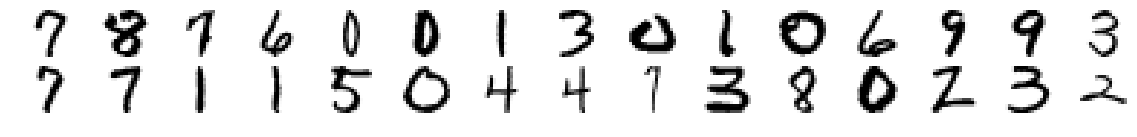

In [81]:
indices = np.random.choice(range(len(classifier.X)), 30)
sample_digits = classifier.X[classifier.wrong_predicated_indices]

fig = plt.figure(figsize=(20, 6))

for i in range(num_samples):
    ax = plt.subplot(6, 15, i + 1)
    img = sample_digits[i].reshape((16, 16))
    plt.imshow(img, cmap='gray_r')
    plt.axis('off')